# **1. 파이썬을 통한 금융 데이터 처리**

###1. 데이터프레임과 시리즈 만들기

In [ ]:
import numpy as np
import pandas as pd

#시리즈로 만들기
my_series = pd.Series({"United Kingdom":"London", "India":"New Delhi", "United States":"Washington", "Belgium":"Brussels"})
print(pd.DataFrame(my_series))
df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6]]))

# 몇행몇열
print(df.shape)

# 몇행 확인
print(len(df.index))
df[0].count()	#NaN은 제외하고 카운트
list(df.columns.values)

                         0
United Kingdom      London
India            New Delhi
United States   Washington
Belgium           Brussels
(2, 3)
2


[0, 1, 2]

###2. Index, Column 선택하기

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6],[7,8,9]]), columns=['A','B','C'])
df.A    #특정 컬럼 선택, Series
df['A']

#.loc[]: 인덱스 라벨에 사용,loc[2]이면, 2라는 라벨을 갖는 인덱스를 의미
#.iloc[]: 인덱스에 사용, iloc[2]는 2의 위치(3번째)의미

df.iloc[ 0 , 1 ]  #numpy array 처럼 사용하기
df.iloc[ :, 1 ]

df.loc[: , 'A']
df.loc[ 1, 'B'] #여기서1은 index가 1을 의미
df.iloc[ 1, 1 ] #여기서의 1은 두번째값이라는 의미

#print(df.iloc[0][0])	# iloc[]
#print(df.loc[0]['A'])	# loc[]
#print(df.iloc[0])	# iloc[]로 행선택

print(df.loc[:,'A'])	# loc[]로 열선택
print(df.loc[0,'A'])
print(df.iloc[0,0])

#df에서 2행, 1-2열 선택하시오.
df.iloc[ 1  , 0:2  ]

#df에서 2-3행, 1-3열 선택하시오.
df.iloc[ 1:3,  :  ]

0    1
1    4
2    7
Name: A, dtype: int64
1
1


,A,B,C
1,4,5,6
2,7,8,9


###3. Index, Row, Column 추가

In [ ]:
df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6]]), columns=['A','B','C'])
df.set_index('C')	# C열이 index로 지정됨

#열 추가
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])
df['D'] = df.index

#열 추가2
df = pd.DataFrame(data=np.array([[1, 1, 2], [3, 2, 4]]))
df.loc[:, 4] = pd.Series(['5', '6'], index=df.index)	# Append a column to `df`
print(df)

# reset_index()로 인덱스 값 재설정
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), index= [2.5, 12.6, 4.8], columns=[48, 49, 50])
df_reset = df.reset_index(level=0, drop=True)	#drop 인덱스 제거, inplace 기존 인덱스가 새로운 컬럼으로 추가됨
print(df_reset)


   0  1  2  4
0  1  1  2  5
1  3  2  4  6
   48  49  50
0   1   2   3
1   4   5   6
2   7   8   9


###4. index, row, column 삭제

In [ ]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [40, 50, 60], [23, 35, 37]]),index= [2.5, 12.6, 4.8, 4.8, 2.5],  columns=[48, 49, 50])
df.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')

# A 열 삭제
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])
df.drop('A', axis=1, inplace=True)
df.drop(df.columns[[1]], axis=1)	#axis 0: row, 1: column

#행 삭제
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [40, 50, 60], [23, 35, 37]]),index= [2.5, 12.6, 4.8, 4.8, 2.5],  columns=[48, 49, 50])
print(df.drop(df.index[1]))	# 인덱스 1 위치 행 삭제



     48  49  50
2.5   1   2   3
4.8   7   8   9
4.8  40  50  60
2.5  23  35  37


###5. 데이터프레임 값 변경




In [ ]:
# 문자열을 0~4로 교체
df = pd.DataFrame(data=np.array([['OK', 'Perfect', 'Acceptable'], ['Awful','Awful', 'Perfect'], ['Acceptable', 'OK', 'Poor']]), columns=['Student1', 'Student2', 'Student3'])
df.replace(['Awful', 'Poor', 'OK', 'Acceptable', 'Perfect'], [0, 1, 2, 3, 4])

#정규표현식으로 문자열 제거
df = pd.DataFrame(data=np.array([['1\n', 2, '3\n'], [4, 5, '6\n'], [7, '8\n', 9]]))
df.replace({'\n': '<br>'}, regex=True)


,0,1,2
0,1<br>,2,3<br>
1,4,5,6<br>
2,7,8<br>,9


In [ ]:
#weatherAUS.csv를 읽으셔서, 범주형 컬럼을 찾아보세요

#RainTomorrow 라는 컬럼의 값을 Yes->1, No->0 바꿔보세요

import pandas as pd
weather = pd.read_csv("weatherAUS.csv")
#weather.info()
[ i for i in weather.columns if weather[i].dtype=="O"]
weather.RainTomorrow.replace( ["Yes", "No"], [1,0])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21926    0.0
21927    0.0
21928    1.0
21929    0.0
21930    0.0
Name: RainTomorrow, Length: 21931, dtype: float64

In [ ]:
#값 변경
df = pd.DataFrame(data=np.array([[1, 2, '+3b'], [4, 5, '-6b'], [7, 8, '+9A']]), columns=['class', 'test', 'result'])
df['result'] = df['result'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))


In [ ]:
#열의 텍스트를 여러 줄로 나누기
df = pd.DataFrame(data=np.array([[34, 0, '23:44:55'], [22, 0, '66:77:88'], [19, 1, '43:68:05 56:34:12']]), columns=['Age', 'PlusOne', 'Ticket'])

# 3행에 값이 2개인 ticket 열을 여러 줄로 나누고 시리즈로 만들고 값을 추가
ticket_series = df['Ticket'].str.split(' ').apply(pd.Series, 1).stack()
ticket_series.index = ticket_series.index.droplevel(-1)	#인덱스가 여러개여서, 2번째 인덱스 삭제
ticketdf = pd.DataFrame(ticket_series)
ticketdf
del df['Ticket']
df.join(ticketdf) #merge

,Age,PlusOne,0
0,34,0,23:44:55
1,22,0,66:77:88
2,19,1,43:68:05
2,19,1,56:34:12


###6.데이터프레임에 함수 적용

In [ ]:
#행/열에 함수 적용
def doubler(x):
    if x % 2 == 0:
        return x
    else:
        return x * 2

df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])
df['A'].apply(doubler)	# doubler라는 함수를 A열에 적용
doubled_df = df.applymap(doubler)	# `applymap()`는 데이터프레임 전체에 행/열 단위 적용시
print(doubled_df)


    A   B   C
0   2   2   6
1   4  10   6
2  14   8  18


###7. 데이터프레임 탐색, Missing Value 확인 및 비어있는 DF 만들기


    A
0 NaN
1 NaN
2 NaN
3 NaN


<Axes: >

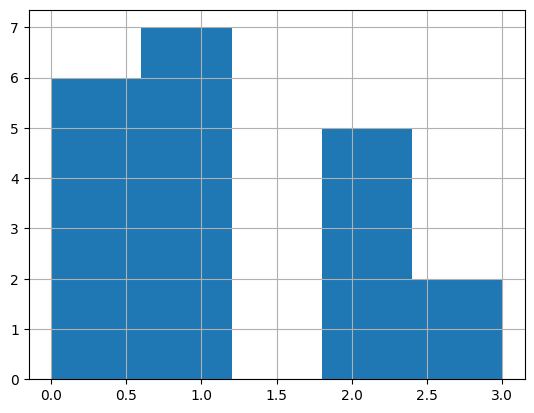

In [ ]:
import numpy as np
df = pd.DataFrame(np.nan, index=[0,1,2,3], columns=['A'])
print(df)

df.isnull()
df.isnull().mean()

#eda
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame( [1,0,0,1,2,1,1,1,0,0,0,2,2,1,3,3,2,2,1,0], columns=['v1'])
data.dtypes #컬럼별 값의 타잎

data['v1'].unique()

#Histogram
data['v1'].hist(bins=5)

###8. 데이터프레임 형태 변경

In [ ]:
#피벗
#values: 피벗테이블 정리를 원하는 값
#columns: 피벗의 열
#index: 피벗의 행
import pandas as pd
products = pd.DataFrame({'category': ['Cleaning', 'Cleaning', 'Entertainment', 'Entertainment', 'Tech', 'Tech'],'store': ['Walmart', 'Dia', 'Walmart', 'Fnac', 'Dia','Walmart'],'price':[11.42, 23.50, 19.99, 15.95, 55.75, 111.55],'testscore': [4, 3, 5, 7, 5, 8]})
pivot_products = products.pivot(index='category', columns='store', values='price')
print(pivot_products)

pivot_products2 = products.pivot_table(index='category', columns='store', values='price', aggfunc='mean')
print(pivot_products2)


store            Dia   Fnac  Walmart
category                            
Cleaning       23.50    NaN    11.42
Entertainment    NaN  15.95    19.99
Tech           55.75    NaN   111.55
store            Dia   Fnac  Walmart
category                            
Cleaning       23.50    NaN    11.42
Entertainment    NaN  15.95    19.99
Tech           55.75    NaN   111.55


In [ ]:
#Melting
people = pd.DataFrame({'FirstName' : ['John', 'Jane'],'LastName' : ['Doe', 'Austen'],'BloodType' : ['A-', 'B+'],'Weight' : [90, 64]})
people  #wide

,FirstName,LastName,BloodType,Weight
0,John,Doe,A-,90
1,Jane,Austen,B+,64


In [ ]:
print(pd.melt(people, id_vars=['FirstName', 'LastName'], var_name='measurements'))#long

  FirstName LastName measurements value
0      John      Doe    BloodType    A-
1      Jane   Austen    BloodType    B+
2      John      Doe       Weight    90
3      Jane   Austen       Weight    64


###9. 데이터프레임 연산

In [ ]:
df2 = pd.DataFrame( np.array( [[1,2], [3,4], [5,6]] ))

df1 = pd.DataFrame( [[1,2], [3,4], [5,6]],
                   index=['a', 'b', 'c'],
                   columns= ['c1','c2']  )

df1.index = ['2022-04-28','2022-04-29', '2022-04-30']
df2.index = ['2022-04-26','2022-04-27', '2022-04-28']

df1.columns = ['c1', 'c2']
df2.columns = ['c2', 'c3']

print(df1+df2)


            c1   c2  c3
2022-04-26 NaN  NaN NaN
2022-04-27 NaN  NaN NaN
2022-04-28 NaN  7.0 NaN
2022-04-29 NaN  NaN NaN
2022-04-30 NaN  NaN NaN


###10. 파일쓰기 및 읽기

In [ ]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])

df.to_csv('test.csv', sep='\t', encoding='utf-8')

writer = pd.ExcelWriter('test.xlsx')
df.to_excel(writer, 'DataFrame')

#CP949인코딩
df2 = pd.read_csv("파일명.csv", encoding="CP949")

###11. ExcelWriter

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
tips = sns.load_dataset("tips")

In [ ]:
with pd.ExcelWriter("example.xlsx") as writer:
    diamonds.to_excel(writer, sheet_name="diamonds")
    tips.to_excel(writer, sheet_name="tips")

###12. groupby + nth row

In [ ]:
diamonds.cut.value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [ ]:
diamonds.groupby("cut").nth(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
20,0.30,Good,I,SI2,63.3,56.0,351,4.26,4.30,2.71
21,0.23,Very Good,E,VS2,63.8,55.0,352,3.85,3.92,2.48
26,0.24,Premium,I,VS1,62.5,57.0,355,3.97,3.94,2.47
40,0.33,Ideal,I,SI2,61.2,56.0,403,4.49,4.50,2.75
128,0.91,Fair,H,SI2,64.4,57.0,2763,6.11,6.09,3.93


In [ ]:
#tips 자료에서 요일별로 그룹바이, 3번째값을 출력해보세요
tips.groupby("day").nth(2)

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
21,20.29,2.75,Female,No,Sat,Dinner,2
79,17.29,2.71,Male,No,Thur,Lunch,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2


###13. factorize
- LabelEncoder 대신 사용

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(....)

In [ ]:
pd.get_dummies( diamonds.cut)#OHE
pd.factorize(diamonds["cut"])#LE

(array([0, 1, 2, ..., 3, 1, 0]),
 CategoricalIndex(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], categories=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], ordered=False, dtype='category'))

In [ ]:
diamonds.sample(frac=0.1)  #sampling
#frac: 비율 지정, replace: 복원 비복원 지정

,carat,cut,color,clarity,depth,table,price,x,y,z
16201,1.06,Good,G,VS1,63.4,57.0,6477,6.45,6.48,4.10
41860,0.59,Very Good,J,VS2,60.8,56.6,1257,5.42,5.47,3.31
10766,0.89,Ideal,F,VS2,61.5,55.0,4854,6.18,6.21,3.81
14061,0.30,Good,H,VVS2,63.5,55.0,605,4.25,4.28,2.71
30435,0.32,Very Good,H,VVS1,62.9,57.0,730,4.33,4.38,2.74
...,...,...,...,...,...,...,...,...,...,...
7864,1.00,Good,E,SI2,62.1,61.0,4307,6.36,6.40,3.96
6321,1.11,Very Good,H,SI2,63.4,55.0,4028,6.54,6.51,4.14
13223,1.50,Premium,G,SI2,61.7,55.0,5460,7.39,7.32,4.54
40781,0.43,Good,F,VS1,61.4,61.1,1167,4.85,4.87,2.98


In [ ]:
diamonds["cut_enc"] = pd.factorize(diamonds["cut"])[0]
diamonds["cut_enc"].sample(5)
#diamonds.sample(frac=1)

30102    3
7609     1
39806    0
19135    3
12680    0
Name: cut_enc, dtype: int64

In [ ]:
odes, unique = pd.factorize(diamonds["cut"], sort=True)
odes #결과 array
unique#범주정보

CategoricalIndex(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], categories=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], ordered=False, dtype='category')

In [ ]:
#Tips 자료에서 time 변수를 factorize 시켜서, time_enc라는 변수로
#tips에 추가해주세요
#tips에서 랜덤하게 1%자료를 샘플링해보세요
a, b = pd.factorize( tips.time)
tips["time_enc"] = a
tips.sample( frac = 0.01 )

,total_bill,tip,sex,smoker,day,time,size,time_enc
155,29.85,5.14,Female,No,Sun,Dinner,5,0
200,18.71,4.00,Male,Yes,Thur,Lunch,3,1


###14. explode

In [ ]:
data = pd.Series([1, 6, 7, [46, 56, 49], 45,
                  [15, 10, 12]]).to_frame("dirty")
data.values
data.explode("dirty", ignore_index=True)

,dirty
0,1
1,6
2,7
3,46
4,56
5,49
6,45
7,15
8,10
9,12


###15. between

In [ ]:
idx = diamonds["price"].between(3500, 3700)#3500이상, 3700이하
diamonds[ idx ]

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_enc
3935,0.90,Very Good,H,SI1,63.3,58.0,3500,6.04,6.13,3.85,3
3936,0.93,Good,H,VS1,59.1,64.0,3500,6.36,6.27,3.73,2
3937,0.90,Ideal,G,SI2,62.4,56.0,3500,6.14,6.19,3.85,0
3938,0.83,Ideal,F,SI1,61.7,57.0,3500,6.04,6.08,3.74,0
3939,0.90,Fair,H,VS1,65.9,60.0,3500,5.99,5.96,3.94,4
...,...,...,...,...,...,...,...,...,...,...,...
4804,0.90,Very Good,F,SI1,63.8,54.0,3699,6.09,6.13,3.90,3
4805,0.90,Very Good,F,SI1,63.4,57.0,3699,6.06,6.11,3.86,3
4806,0.90,Good,F,SI1,58.0,58.0,3699,6.24,6.28,3.63,2
4807,1.00,Fair,G,SI1,66.1,62.0,3700,6.10,6.03,4.01,4


In [ ]:
diamonds[diamonds["price"].between(3500, 3700, inclusive="neither")].sample(5)
#3500 초과, 3700 미만

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_enc
4286,0.70,Ideal,E,VVS2,62.2,54.0,3585,5.68,5.74,3.55,0
4142,0.90,Premium,H,SI1,62.7,58.0,3545,6.14,6.20,3.87,1
4696,1.01,Premium,H,SI2,61.6,60.0,3676,6.22,6.18,3.82,1
3942,0.80,Very Good,D,SI1,62.9,60.0,3502,5.89,5.94,3.72,3
4698,1.01,Good,I,SI1,64.1,59.0,3676,6.24,6.21,3.99,2


In [ ]:
#tips자료에서 total_bill이 중앙값 이상 최대값 이하에 해당하는
#행들을 선택해서, 10%만 출력해보세요.
tips.total_bill.median() #중앙값
tips.total_bill.max()

50.81

###16. styler

In [ ]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.describe().T.drop("count", axis=1)

,mean,std,min,25%,50%,75%,max
Pregnancies,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
diabetes.describe().T.drop("count", axis=1).style.highlight_max(color="darkred")

,mean,std,min,25%,50%,75%,max
Pregnancies,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
diabetes.describe().T.drop("count",
                           axis=1).style.background_gradient(
    subset=["mean", "50%"], cmap="Reds"
)

,mean,std,min,25%,50%,75%,max
Pregnancies,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
tips.columns
#tips에서 total_bill하고, tip 컬럼을 선택하세요
#각 변수의 최소값에 하이라이트 해보세요
tips[ ["total_bill", "tip"]].style.highlight_min(color="darkred")

,total_bill,tip
0,16.990000,1.010000
1,10.340000,1.660000
2,21.010000,3.500000
3,23.680000,3.310000
4,24.590000,3.610000
5,25.290000,4.710000
6,8.770000,2.000000
7,26.880000,3.120000
8,15.040000,1.960000
9,14.780000,3.230000


###17. convert_dtypes


In [ ]:
diamonds.dtypes
diamonds.convert_dtypes().dtypes  #데이터프레임의 dtype 을
#보다 적절한 dtype으로 변환

carat       Float64
cut        category
color      category
clarity    category
depth       Float64
table       Float64
price         Int64
x           Float64
y           Float64
z           Float64
cut_enc       Int64
dtype: object

###18. select_dtypes

In [ ]:
diamonds.select_dtypes(include=np.number).head()

,carat,depth,table,price,x,y,z,cut_enc
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,1
2,0.23,56.9,65.0,327,4.05,4.07,2.31,2
3,0.29,62.4,58.0,334,4.20,4.23,2.63,1
4,0.31,63.3,58.0,335,4.34,4.35,2.75,2


In [ ]:
diamonds.select_dtypes(exclude=np.number).head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [ ]:
#diamonds에서 'category' dtype 컬럼만 제외해서 5개만 샘플링
diamonds.select_dtypes(exclude='category').sample(5)

,carat,depth,table,price,x,y,z,cut_enc
36561,0.40,62.8,59.0,945,4.69,4.64,2.93,1
38460,0.38,63.8,57.0,1030,4.57,4.61,2.93,3
33402,0.28,62.4,55.0,828,4.20,4.17,2.61,0
30255,0.31,60.4,61.0,725,4.34,4.40,2.64,3
13930,1.00,59.9,57.0,5667,6.45,6.51,3.88,2


###19. mask

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
tips = sns.load_dataset("tips")

In [ ]:
ages = pd.Series([55, 52, 50, 66, 57, 59, 49, 60]).to_frame("ages")
ages

,ages
0,55
1,52
2,50
3,66
4,57
5,59
6,49
7,60


In [ ]:
~ages["ages"].between(50, 60) #50보다 작거나, 60보다 크면 true

0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
Name: ages, dtype: bool

In [ ]:
ages.mask(cond=~ages["ages"].between(50, 60), other=np.nan)

,ages
0,55.0
1,52.0
2,50.0
3,NaN
4,57.0
5,59.0
6,NaN
7,60.0


###20. nlargest, nsmallest

In [ ]:
diamonds.nlargest(5, "price")

,carat,cut,color,clarity,depth,table,price,x,y,z
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01


In [ ]:
diamonds.nsmallest(5, "price")

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


###21. idxmax, idxmin


In [ ]:
diamonds.price.idxmax() #price 컬럼의 최대값이 있는 행번호..
diamonds.carat.idxmin() # carat 컬럼의 최소값이 있는...

14

###22. clip

In [ ]:
ages.clip(50, 60)

,ages
0,55
1,52
2,50
3,60
4,57
5,59
6,50
7,60


###23. hasnans

In [ ]:
series = pd.Series([2, 4, 6, "sadf", np.nan])

series.hasnans

True

###24. at, iat

In [ ]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
diamonds.at[234, "cut"]
diamonds.iat[1564, 4]

61.2

In [ ]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
#tips에서 tip 컬럼의 최대값이 행을 찾아보세요
tips.tip.idxmax()
tips.loc[ 170, :]
#tips에서 total_bill 값이 제일 작은 5개 행을 출력하세요
tips.nsmallest(5, "total_bill")
#tips에서 day컬럼의 3번째행 값을 출력하세요
tips.at[2, "day"]

'Sun'

###25. argsort

In [ ]:
tips.reset_index(inplace=True, drop=True)

sort_idx = tips["total_bill"].argsort(kind="mergesort")
#total_bill 컬럼에서 각 값의 크기 순서를 숫자로 출력
print(sort_idx)
# `tips`를 total_bill 값으로 정렬
tips.iloc[sort_idx].head()
#각 행을 sort_idx의 숫자 위치로 재배치...

0       67
1       92
2      111
3      172
4      149
      ... 
239    182
240    156
241     59
242    212
243    170
Name: total_bill, Length: 244, dtype: int64


,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
149,7.51,2.00,Male,No,Thur,Lunch,2


###26. 행 선택

In [ ]:
tips.loc[tips['day'] == 'Sat']
tips.loc[(tips['day'] == 'Sat') & (tips['time'] == 'Dinner')]

,total_bill,tip,sex,smoker,day,time,size
19,20.65,3.35,Male,No,Sat,Dinner,3
20,17.92,4.08,Male,No,Sat,Dinner,2
21,20.29,2.75,Female,No,Sat,Dinner,2
22,15.77,2.23,Female,No,Sat,Dinner,2
23,39.42,7.58,Male,No,Sat,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [ ]:
tips.loc[tips['day'].str.contains('un')]  #str: 문자열 사용하게 하는 accessor
tips.loc[tips['day'].str.startswith('S')]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [ ]:
tips.loc[tips['day'].isin(['Sun', 'Sat'])]  #day컬럼값이 Sun, Sat 중에 있는지 체크

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


###27. 열 추가 / 행 추가

In [ ]:
df = pd.DataFrame( {'colA':[1,2], 'colB':[0,1] })

In [ ]:
#행 추가
new_row = {'colA':3, 'colB':5}
df2 = pd.concat([df, pd.DataFrame( new_row, index=[0] ) ])
df2

,colA,colB
0,1,0
1,2,1
0,3,5


In [ ]:
#열 추가
df2['newCol'] = 0
df2.loc[:,'newCol'] = [3,4,5]
df2

,colA,colB,newCol
0,1,0,3
1,2,1,4
0,3,5,5


In [ ]:
#열 순서 변경
df2[['newCol','colB', 'colA']]

,newCol,colB,colA
0,3,0,1
1,4,1,2
0,5,5,3


###28. 열 합치기 /  나누기

In [ ]:
df

,colA,colB
0,1,0
1,2,1


In [ ]:
#열 합치기
def mergeCols(a, b):
    return str(a) + "," + str(b)
df['AB'] = df.apply(lambda x: mergeCols(x['colA'], x['colB']), axis = 1)
df

,colA,colB,AB
0,1,0,"1,0"
1,2,1,"2,1"


In [ ]:
#열 나누기
def splitCols(row):
    return row.split(',')

df = df.merge(df['AB'].apply(lambda x: pd.Series({'A':splitCols(x)[0], 'B':splitCols(x)[1]})),
    left_index = True, right_index = True)  #join key로 양쪽의 index를 사용

del df['AB']  #원본 열은 삭제
df

,colA,colB,A,B
0,1,0,1,0
1,2,1,2,1


###29. 자릿수

In [ ]:
long_decimals_info = {
    "Salary": [100000.23400000, 95000.900300, 103000.2300535, 65984.14000450, 150987.080345],
    "Height": [6.501050, 5.270000, 5.5900001050, 6.730001050, 6.92100050],
    "weight": [185.23000059, 105.1200099, 110.350003, 190.12000000, 200.59000000]
}

long_decimals_df = pd.DataFrame(long_decimals_info)
fewer_decimals_df = long_decimals_df.round(decimals=2)  #소수 셋째 자리에서 반올림
fewer_decimals_df

,Salary,Height,weight
0,100000.23,6.50,185.23
1,95000.90,5.27,105.12
2,103000.23,5.59,110.35
3,65984.14,6.73,190.12
4,150987.08,6.92,200.59


###30.데이터프레임 비교

In [ ]:
import pandas as pd
dia_df_test = diamonds.copy()
dia_df_test.loc[0, 'price'] = 10

diamonds.compare(dia_df_test)

price      
    self other
0  326.0  10.0

###31.wide to long

In [ ]:
import pandas as pd

candidates= {
    'Name':["Aida","Mamadou","Ismael","Aicha"],
    'ID': [1, 2, 3, 4],
    '2017':[85, 87, 89, 91],
    '2018':[96, 98, 100, 102],
    '2019':[100, 102, 106, 106],
    '2020':[89, 95, 98, 100],
    '2021':[94, 96, 98, 100],
    '2022':[100, 104, 104, 107],
          }
salary_data = pd.DataFrame(candidates)
salary_data

,Name,ID,2017,2018,2019,2020,2021,2022
0,Aida,1,85,96,100,89,94,100
1,Mamadou,2,87,98,102,95,96,104
2,Ismael,3,89,100,106,98,98,104
3,Aicha,4,91,102,106,100,100,107


In [ ]:
long_format_data = salary_data.melt(id_vars=['Name', 'ID'],
                                    var_name='Year', value_name='Salary(k$)')
long_format_data

,Name,ID,Year,Salary(k$)
0,Aida,1,2017,85
1,Mamadou,2,2017,87
2,Ismael,3,2017,89
3,Aicha,4,2017,91
4,Aida,1,2018,96
5,Mamadou,2,2018,98
6,Ismael,3,2018,100
7,Aicha,4,2018,102
8,Aida,1,2019,100
9,Mamadou,2,2019,102


In [ ]:
#tips에서 sex, smoker 삭제하세요
#tips에서 id_vars를 day, time, var_name을 num으로 지정하고, 컬럼이름 value로 해서
#melt를 적용하세요,
del tips['sex']
del tips['smoker']

In [ ]:
tips.melt(id_vars=['day', 'time'], var_name='num', value_name='value')

,day,time,num,value
0,Sun,Dinner,total_bill,16.99
1,Sun,Dinner,total_bill,10.34
2,Sun,Dinner,total_bill,21.01
3,Sun,Dinner,total_bill,23.68
4,Sun,Dinner,total_bill,24.59
...,...,...,...,...
727,Sat,Dinner,size,3.00
728,Sat,Dinner,size,2.00
729,Sat,Dinner,size,2.00
730,Sat,Dinner,size,2.00


#3. 시각화와 탐색
###1.수치형 변수 distribution 확인하기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

boston = pd.read_csv("BostonHousing.csv")

In [ ]:
boston.columns
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


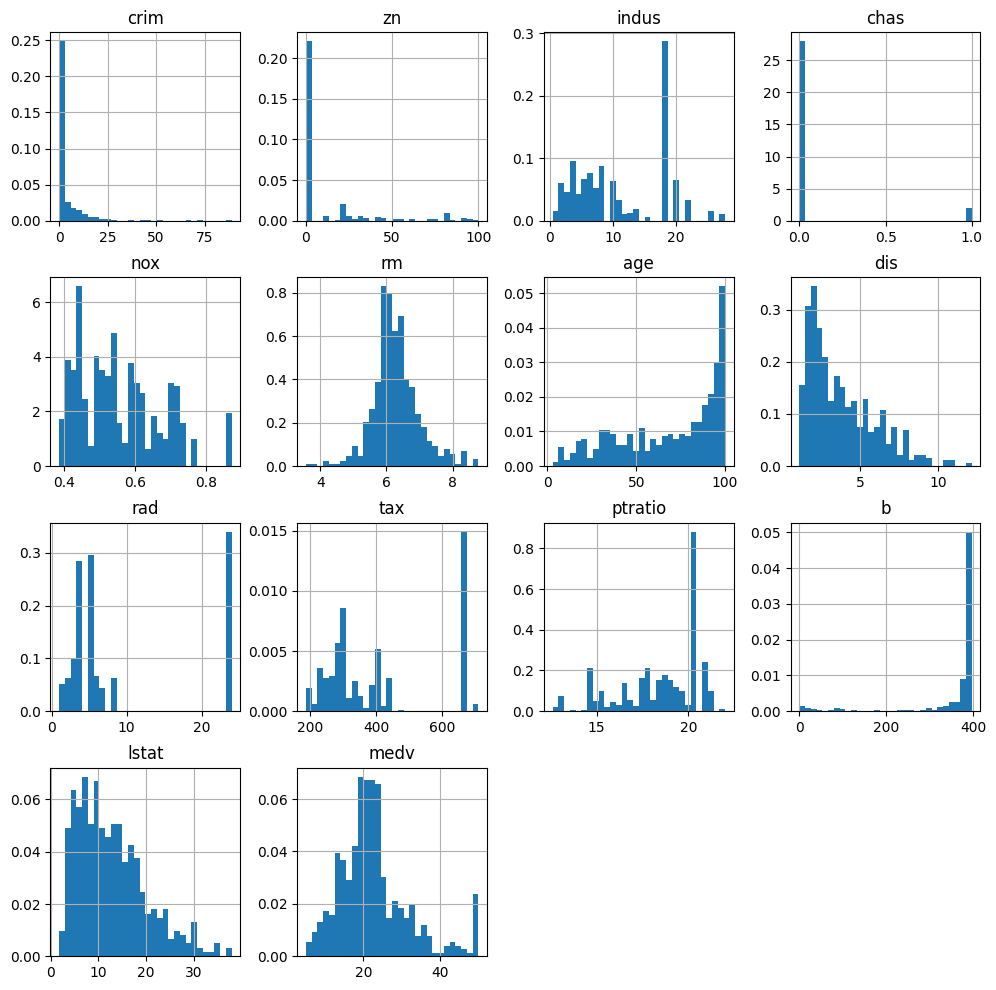

In [ ]:
boston.hist(bins=30, figsize=(12,12), density=True)
plt.show()

###2. 변수 탐색

Text(0.5, 1.0, 'Boxplot')

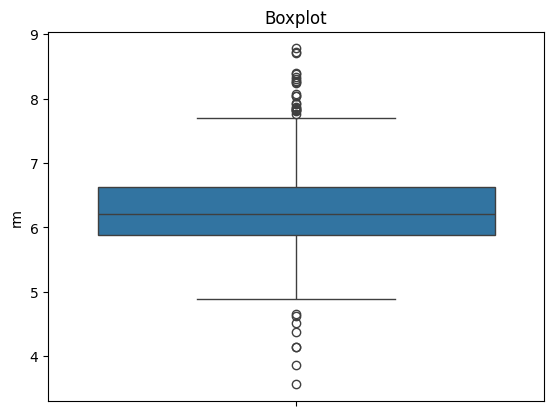

In [ ]:
#Box plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

boston = pd.read_csv("BostonHousing.csv")[['rm', 'lstat', 'crim']]

sns.boxplot(y=boston['rm'])
plt.title('Boxplot')


In [ ]:
#outlier 제거하기
#boxplot의 IQR(Q3-Q1)의 1.5배를 넘는 값들을 제거
def find_boundaries(df, variable, distance):
	IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
	lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
	upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
	return upper_boundary, lower_boundary

upper_boundary, lower_boundary = find_boundaries(boston, 'rm', 1.5)
upper_boundary, lower_boundary

(7.730500000000001, 4.778499999999999)

In [ ]:
a=np.array( [ 2,3,4,5])
print( a > 3 )
np.where( a>3, "A" ,  "B" )
~(a>3)

[False False  True  True]


array([ True,  True, False, False])

In [ ]:
outliers = np.where(boston['rm'] > upper_boundary, True,
                    np.where(boston['rm'] < lower_boundary, True, False)
                    )
~outliers
boston['rm'][~outliers]  #outlier만 출력, T,F로 해당 위치의 값을 선택...

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: rm, Length: 476, dtype: float64

In [ ]:
outliers_df = boston.loc[outliers, 'rm']  #iloc는 정수값...
outliers_df.head()

#outlier 실제로 제거해보기
boston.loc[~outliers, 'rm']

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: rm, Length: 476, dtype: float64

In [ ]:
#crim 변수에서 중앙값보다 크거나, q1보다 작은 값들만 선택하세요
#np.where를 이용하세요
q1 = boston.crim.quantile(0.25)  #Q1
q2 = boston.crim.quantile(0.5)  #Q2, 중앙값
abc = np.where( boston.crim > q2  , True   ,
         np.where( boston.crim < q1, True, False )
         )

boston.crim[abc]
boston.loc[ abc, "crim"]


0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
497    0.26838
501    0.06263
502    0.04527
503    0.06076
505    0.04741
Name: crim, Length: 380, dtype: float64

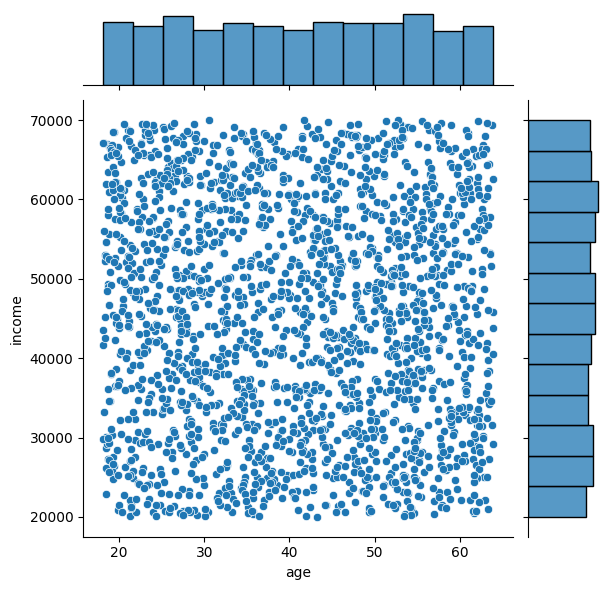

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv("creditset2.csv")
join1 = sns.jointplot(x="age", y="income", data=data);
join1.savefig("join1.png")

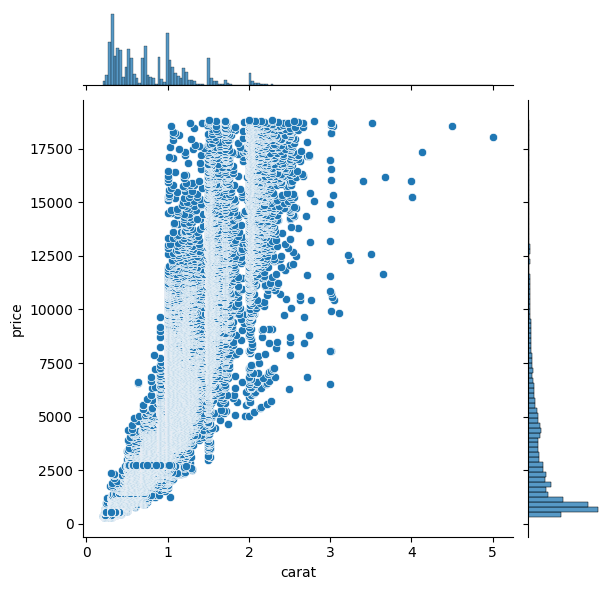

In [ ]:
#diamonds에서 carat과 price에 대한 jointplot을 그려보세요.
sns.jointplot(x="carat", y="price", data=diamonds);


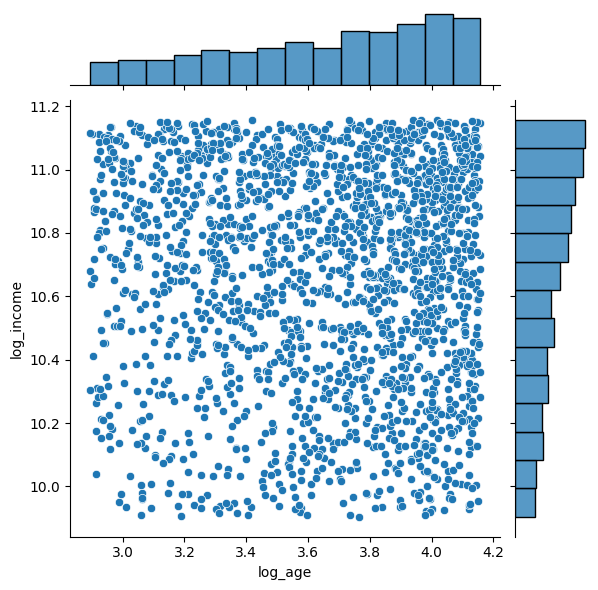

In [ ]:
data["log_age"] = np.log( data.age )
data["log_income"] =np.log( data.income)

join1 = sns.jointplot(x="log_age", y="log_income", data=data);
join1.savefig("join1_log.jpg")

###3. tips데이터 연습

In [ ]:
#tips 예제 데이터로 연습
plt.clf()
tips = sns.load_dataset('tips')
sns.set_style("whitegrid")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 640x480 with 0 Axes>

<Axes: >

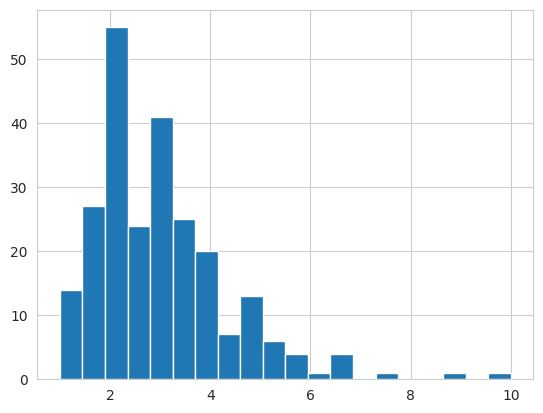

In [ ]:
#tips 자료에서 total_bill, tip 사이의 corr를 구하고, p-value 확인
from scipy import stats
stats.pearsonr( tips.total_bill, tips.tip)
#요일별 빈도 체크
tips.day.value_counts()
#tip에 대한 histogram
tips.tip.hist( bins = 20 )

- tips 데이터에서, time별로 total_bill의 박스플랏
- 각 boxplot은 성별로 나눠서 표현 (hue를 지정)

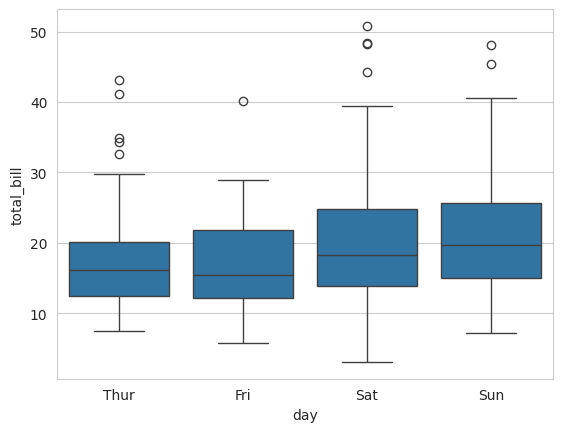

In [ ]:
#box plot
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()

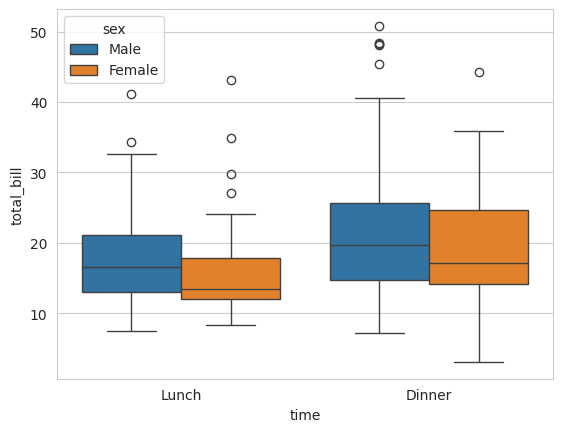

In [ ]:
#box plot
sns.boxplot(x="time", y="total_bill", hue="sex", data=tips)
plt.show()

In [ ]:
#diamond에서 clarity별로 price의 box plot
#위 그림에서, clarity의 범주별 cut의 범주를 분리한 box plot
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

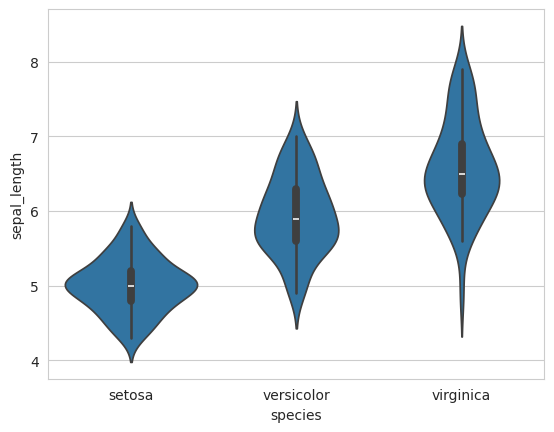

In [ ]:
#violin plot
iris = sns.load_dataset("iris")
sns.violinplot(x=iris.species, y=iris.sepal_length, data=iris);
plt.savefig("violin.png")

<Axes: xlabel='y', ylabel='x'>

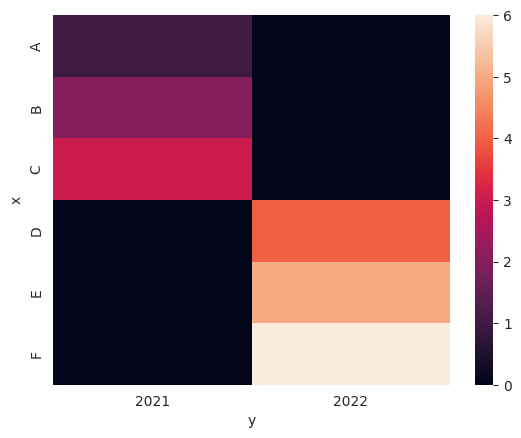

In [ ]:
#pivot+Heatmap
#pivot
df1 = pd.DataFrame( {'x':['A','B', 'C', 'D', 'E', 'F'], 'y':[2021,2021,2021,2022,2022,2022], 'z':[1,2,3,4,5,6]})
df1
df1.pivot_table(index='x',columns='y', values='z').fillna(0)
df1.groupby(["x","y"])["z"]
df2 = df1.pivot(index='x',columns='y', values='z').fillna(0) #index 중복 없어야 함.
sns.heatmap(df2)

In [ ]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


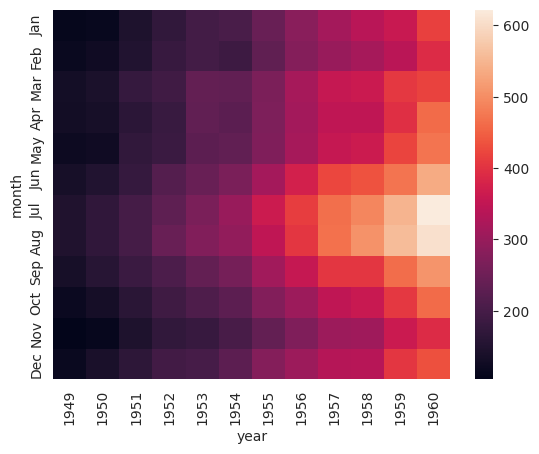

In [ ]:
df = flights.pivot(index='month', columns='year', values='passengers') #행, 열 지정, 값 지정
df.head()
fig = sns.heatmap( df )


###4.diabete 데이터 연습

<Axes: >

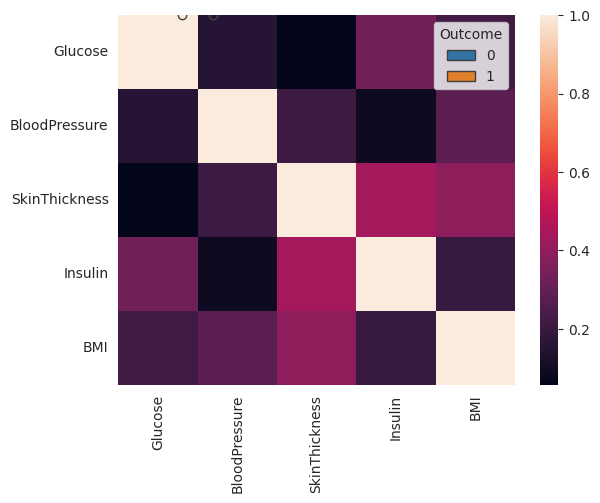

In [ ]:
#diabetes.csv를 읽고, Outcome 값과, Age를 이용해서 BMI에 값을 box plot으로 표현
#Age가 30살 미만, 이상인지로 나누기
dia = pd.read_csv("diabetes.csv")
dia["Age2"] = dia.Age>=30  #np.where( dia.Age >=0, "Old", "Young")
sns.boxplot( x="Age2", y="BMI", hue="Outcome", data=dia)

#Glucose	BloodPressure	SkinThickness	Insulin	BMI	의 corr을 구해보시고, 히트맵으로 표현
sns.heatmap( dia.iloc[:, 1:6].corr() )

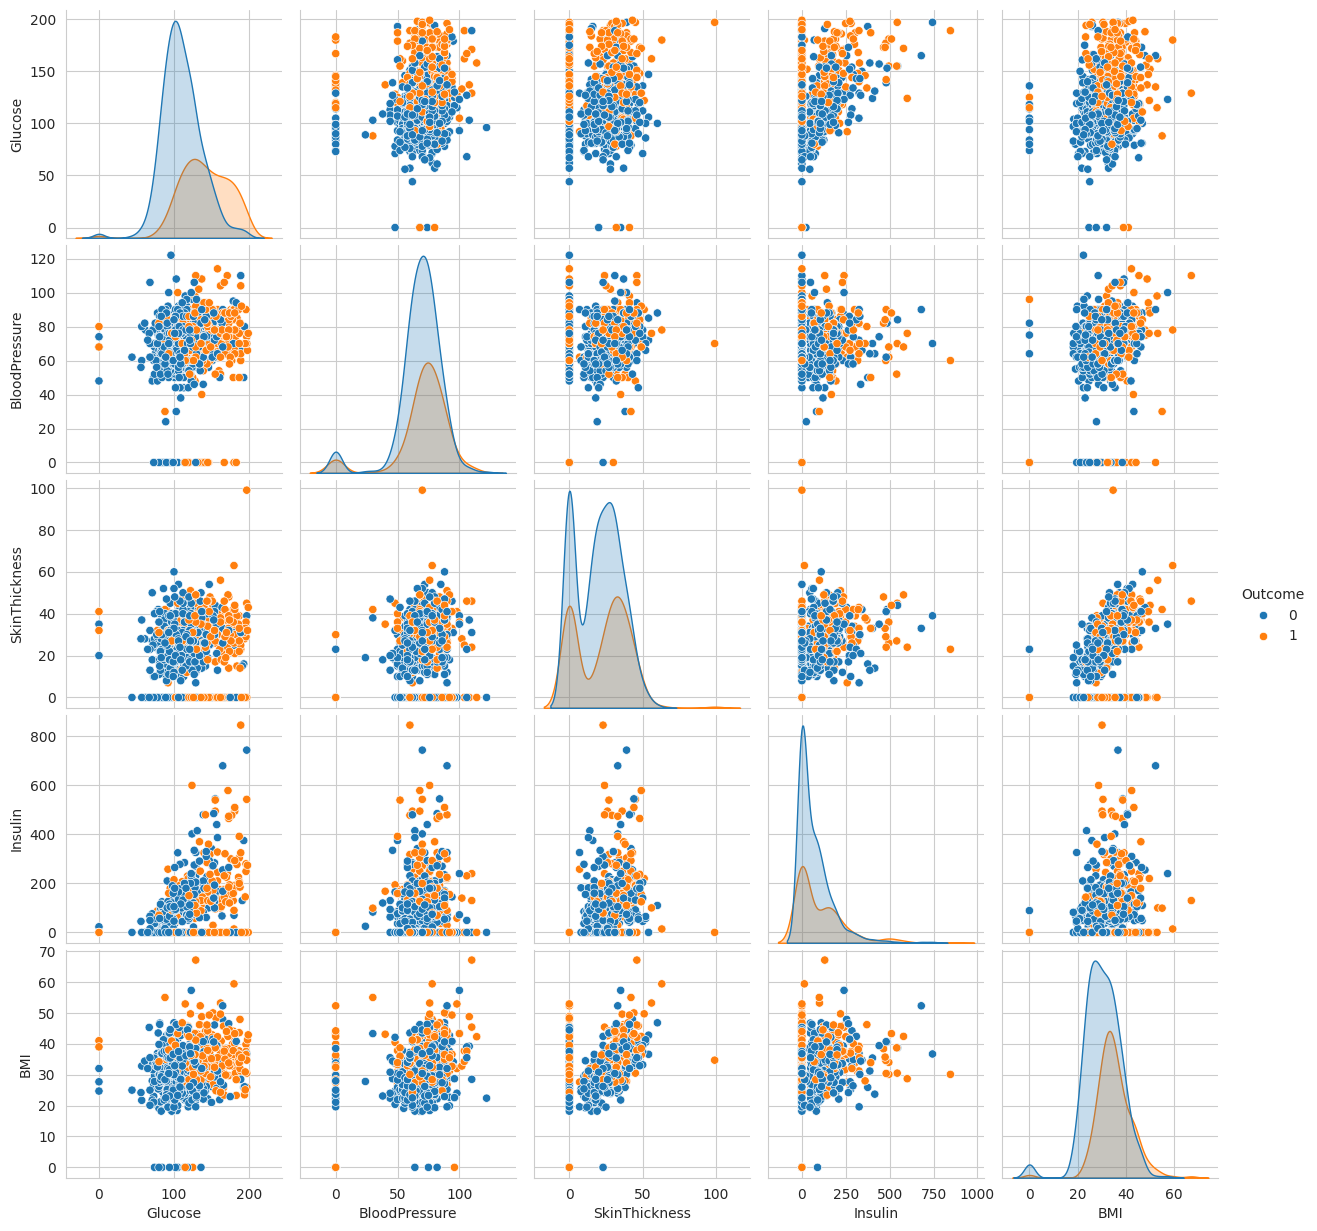

In [ ]:
#diabetes.csv 를 읽어서, Glucose	BloodPressure	SkinThickness	Insulin	BMI 변수들pairplot, 색상은 Outcome
sns.pairplot( dia[ ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Outcome" ]],
             hue="Outcome")

plt.savefig('out1.jpg')
#결과는 out1.jpg로 저장

###5. 선형관계의 시각화

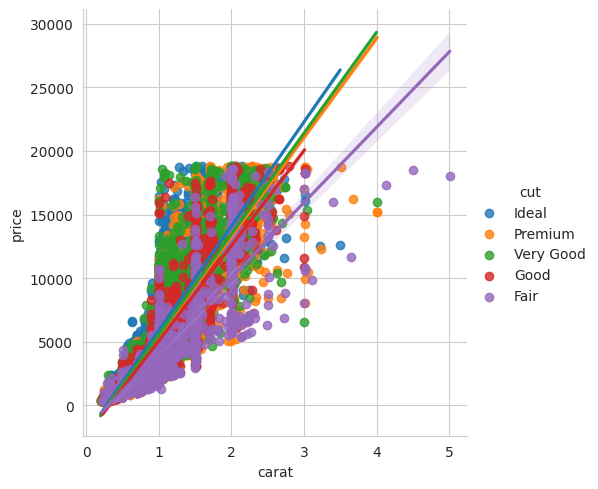

In [ ]:
#diamonds에서 carat과 price에 대해서 lmplot을 그려보세요
#위의 그림 + hue에다가 cut을 지정해서 그려보세요.
sns.lmplot(x="carat",  y="price",  data=diamonds,  hue="cut" )
plt.savefig("test.jpg")

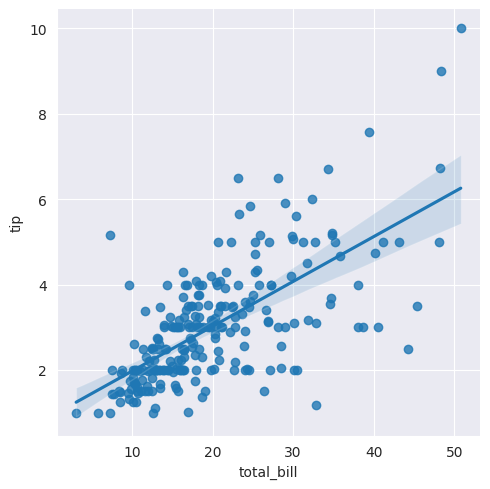

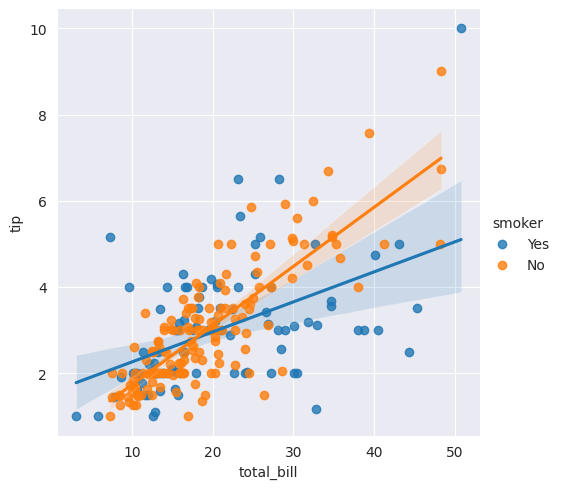

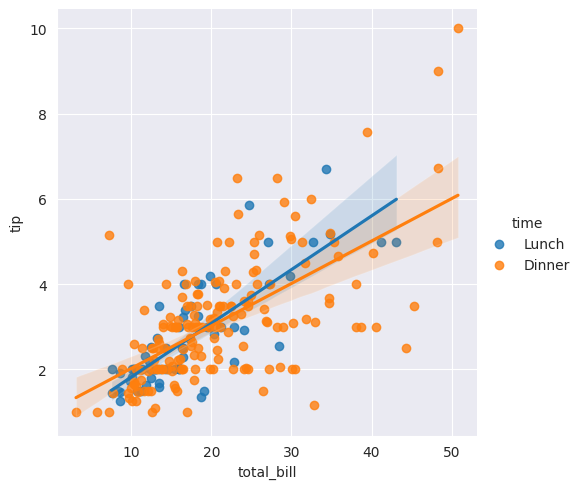

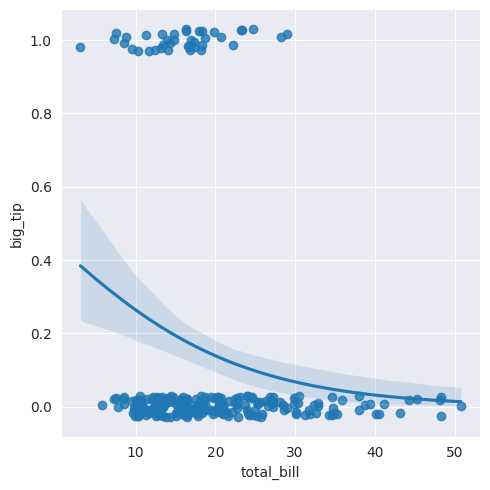

In [ ]:
#lm plot
sns.set_style("darkgrid")
sns.lmplot( x="total_bill", y="tip", data=tips)
plt.show()

#lm plot
sns.set_style("darkgrid")
sns.lmplot( x="total_bill", y="tip", data=tips, hue="smoker")
plt.show()

#lm plot
sns.set_style("darkgrid")
sns.lmplot( x="total_bill", y="tip", data=tips, hue="time")
plt.show()

#logistic regression 결과, binary 표시(20%기준)
tips['big_tip'] = tips['tip']/tips['total_bill'] >= 0.2
sns.lmplot(x="total_bill", y="big_tip", data=tips,logistic=True, y_jitter=.03);
plt.savefig("tiplogit.png")


#4. 금융 데이터 다운로드

## api 활용 수집


In [ ]:
!pip install -U pykrx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 14.7 MB/s eta 0:00:00


In [ ]:
from pykrx import stock

tickers = stock.get_market_ticker_list("20210115")
tickers

stock1 = stock.get_market_ticker_name("000660")
stock1

df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930")
df.head(5)

df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930", "m")
df.head(5)

,시가,고가,저가,종가,거래량
날짜,,,,,
2021-01-31,81000,90000,80200,88800,207737907


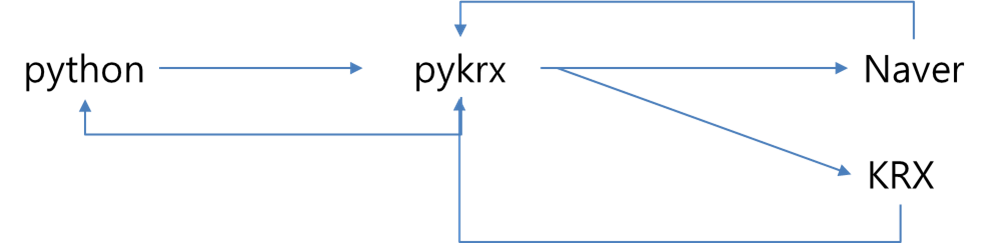

In [ ]:
from pykrx import stock

tickers = stock.get_market_ticker_list("20210115")
len(tickers)
tickers

stock1 = stock.get_market_ticker_name("060310")
stock1


'3S'

In [ ]:
df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930")
df.head(5)

#월별: m, 일별: d, 연도별: y
df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930", "d")
df

df = stock.get_market_ohlcv_by_date("20201104", "20210108", "005930", "m")
df



,시가,고가,저가,종가,거래량
날짜,,,,,
2020-11-30,58900,69500,57800,66700,460991347
2020-12-31,67100,81300,67100,81000,529998852
2021-01-31,81000,90000,80200,88800,207737907


In [ ]:
df = stock.get_market_price_change_by_ticker("20210104", "20210115")
print(df.head(5))

df = stock.get_market_ohlcv_by_date("20210104", "20210115", "000020")
df

#KOSPI, KOSDAQ, KONEX 지원
df = stock.get_market_trading_volume_by_date("20210104", "20210115", "KOSPI")
print(df.head(5))

df = stock.get_market_trading_volume_by_date("20200101", "20210115", 'KOSPI', freq='m')
df

df = stock.get_market_trading_value_by_date("20210104", "20210115", "KOSPI")
df


            종목명      시가      종가   변동폭   등락률       거래량          거래대금
티커                                                                 
095570   AJ네트웍스    4615    4510  -105 -2.28   3982449   18726203680
006840    AK홀딩스   25150   26300  1150  4.57   1590631   41092351750
027410      BGF    4895    4830   -65 -1.33   4729036   23091599895
282330   BGF리테일  135500  145000  9500  7.01    809850  114155484750
138930  BNK금융지주    5680    5880   200  3.52  36350605  209410643490
                기관합계      기타법인        개인     외국인합계  전체
날짜                                                    
2021-01-04 -18241927  -2321155  13307925   7255157   0
2021-01-05   -282797 -20356879  21335001   -695325   0
2021-01-06 -28606702   1763197  19464237   7379268   0
2021-01-07  16803440  -4926713 -23957887  12081160   0
2021-01-08 -24886527   1334709   6228334  17323484   0


,기관합계,기타법인,개인,외국인합계,전체
날짜,,,,,
2021-01-04,-1189876714363,69165156608,1031014166618,89697391137,0
2021-01-05,-536265643081,16098509714,728387733108,-208220599741,0
2021-01-06,-1369155503764,37370130195,1729261196142,-397475822573,0
2021-01-07,1033917002121,36342229807,-1183634539101,113375307173,0
2021-01-08,-1147931424901,63596153201,-559141825960,1643477097660,0
2021-01-11,-3743203896260,-31327947241,4492145003867,-717613160366,0
2021-01-12,-1723898682006,30388878033,2312445113552,-618935309579,0
2021-01-13,-372450411172,9868157834,169086090692,193496162646,0
2021-01-14,-1428981445508,38743362517,712730906649,677507176342,0


In [ ]:
df = stock.get_market_fundamental_by_ticker("20210115")
print(df.head(2))

df = stock.get_market_fundamental_by_date("20210104", "20210115", '005930')
print(df.head(2))

df = stock.get_market_fundamental_by_date("20201004", "20210115", "005930", "m")
print(df.head(2))


          BPS    PER   PBR   EPS   DIV  DPS
티커                                         
095570   6802   4.59  0.66   982  6.65  300
006840  62448  12.13  0.42  2168  2.85  750
              BPS    PER   PBR   EPS   DIV   DPS
날짜                                              
2021-01-04  37528  26.22  2.21  3166  1.71  1416
2021-01-05  37528  26.50  2.24  3166  1.69  1416
              BPS    PER   PBR   EPS   DIV   DPS
날짜                                              
2020-10-31  37528  18.54  1.56  3166  2.41  1416
2020-11-30  37528  18.13  1.53  3166  2.47  1416


In [ ]:
#005930 종목에 대해서 주가를 수집해보세요(특정기간...)

In [ ]:
df = stock.get_market_fundamental_by_date("20230703", "20230707", '005930')
print(df.head(2))

              BPS   PER   PBR   EPS   DIV   DPS
날짜                                             
2023-07-03  57822  9.06  1.26  8057  1.98  1444
2023-07-04  57822  9.06  1.26  8057  1.98  1444


In [ ]:
import pandas as pd
df.index
pd.to_datetime(df.index )

DatetimeIndex(['2023-07-03', '2023-07-04', '2023-07-05', '2023-07-06',
               '2023-07-07'],
              dtype='datetime64[ns]', name='날짜', freq=None)

- 야후 파이낸스

In [1]:
import yfinance as yf

In [2]:
yf.download('005930.KS', start='2023-07-03', end='2023-07-07')

/tmp/ipython-input-2-504137747.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  yf.download('005930.KS', start='2023-07-03', end='2023-07-07')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS
Date,,,,,
2023-07-03,70331.625000,70524.314384,69946.246233,70042.590925,10722181
2023-07-04,70331.625000,70909.693151,70235.280308,70717.003767,10214350
2023-07-05,69368.179688,70620.660710,69271.834993,70331.626628,12310610
2023-07-06,68982.796875,69753.554382,68886.452187,69271.830940,14777667
